
# Building a Retail Data Pipeline

Walmart is the biggest retail store in the United States. Just like others, they have been expanding their e-commerce part of the business. By the end of 2022, e-commerce represented a roaring $80 billion in sales, which is 13% of total sales of Walmart. One of the main factors that affects their sales is public holidays, like the Super Bowl, Labour Day, Thanksgiving, and Christmas.

In this project, i have  created a data pipeline for the analysis of supply and demand around the holidays, along with conducting a preliminary analysis of the data. i worked  with two data sources: grocery sales and complementary data. Y

**grocery_sales**
- "index" - unique ID of the row
- "Store_ID" - the store number
- "Date" - the week of sales
- "Weekly_Sales" - sales for the given store

Also, i have the extra_data.parquet file that contains complementary data:

**extra_data.parquet**
- "IsHoliday" - Whether the week contains a public holiday - 1 if yes, 0 if no.
- "Temperature" - Temperature on the day of sale
- "Fuel_Price" - Cost of fuel in the region
- "CPI" – Prevailing consumer price index
- "Unemployment" - The prevailing unemployment rate
- "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4" - number of promotional markdowns
- "Dept" - Department Number in each store
- "Size" - size of the store
- "Type" - type of the store (depends on Size column)

i have merged these files and performed some data manipulations. The transformed DataFrame can then be stored as the clean_data variable containing the following columns:

- "Store_ID"
- "Month"
- "Dept"
- "IsHoliday"
- "Weekly_Sales"
- "CPI"
- "Unemployment"

After merging and cleaning the data, i have analyzed monthly sales of Walmart and store the results of your analysis as the agg_data variable.


Finally, you should save the clean_data and agg_data as csv files.

It is recommended to use pandas for this project.


## Step 1: Connect to the Database
We'll start by connecting to the PostgreSQL database and fetching the data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import urllib.parse

hostname = '*****'
database = '*****'
username = '*****'
pwd = '*****'
port_id = 5432

try:
    # Establish the connection using psycopg2
    conn = psycopg2.connect(
        host=hostname,
        dbname=database,
        user=username,
        password=pwd,
        port=port_id)

    print("Connection successful")

    # URL encode the password
    encoded_password = urllib.parse.quote(pwd)

    # Create the SQLAlchemy engine
    connection_string = f'postgresql://{username}:{encoded_password}@{hostname}:{port_id}/{database}'
    engine = create_engine(connection_string)

    # Fetch the data
    grocery_sales = pd.read_sql("SELECT * FROM grocery_sales", conn)
    print("Data fetched successfully")

except Exception as error:
    print("Connection failed")
    print(error)


Connection successful
Data fetched successfully


C:\Users\12145\AppData\Local\Temp\ipykernel_66504\386369539.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  grocery_sales = pd.read_sql("SELECT * FROM grocery_sales", conn)


## Step 2: Load Additional Data
Next, we'll load additional data from a Parquet file.

In [3]:

# Load extra data from parquet file
extra_data = pd.read_parquet(r'C:\Users\12145\Documents\SkillTrack\Data Camp Project\extra_data.parquet')
print(extra_data.head())


   index  IsHoliday  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      0          0        42.31       2.572        0.0        0.0        0.0   
1      1          0        42.31       2.572        0.0        0.0        0.0   
2      2          0        42.31       2.572        0.0        0.0        0.0   
3      3          0        42.31       2.572        0.0        0.0        0.0   
4      4          0        42.31       2.572        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  Type      Size  
0        0.0        0.0  211.096358         8.106   3.0  151315.0  
1        0.0        0.0  211.096358         8.106   3.0  151315.0  
2        0.0        0.0  211.096358         8.106   3.0  151315.0  
3        0.0        0.0  211.096358           NaN   3.0  151315.0  
4        0.0        0.0  211.096358           NaN   3.0  151315.0  


## Step 3: Display Columns
We'll display the columns of both the `grocery_sales` and `extra_data` DataFrames.

In [4]:

print("grocery_sales columns:", grocery_sales.columns)
print("extra_data columns:", extra_data.columns)


grocery_sales columns: Index(['index', 'Store_ID', 'Date', 'Dept', 'Weekly_Sales'], dtype='object')
extra_data columns: Index(['index', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')


## Step 4: Combine and Save the Data
We'll combine the two DataFrames and save the result as a CSV file.

In [5]:

# Convert Date to month
grocery_sales['Month'] = pd.to_datetime(grocery_sales['Date']).dt.month
# Select relevant columns
grocery_sales = grocery_sales[['Store_ID', 'Month', 'Dept', 'Weekly_Sales']]

# Select and concatenate relevant columns from extra_data
if 'IsHoliday' in extra_data.columns and 'CPI' in extra_data.columns and 'Unemployment' in extra_data.columns:
    extra_data = extra_data[['IsHoliday', 'CPI', 'Unemployment']]
    
    # Merge the DataFrames
    combined_data = pd.concat([grocery_sales, extra_data], axis=1)
    
    # Save the combined data to a CSV file
    combined_data.to_csv('clean_data.csv', index=False)
    print("clean_data saved successfully.")
else:
    print("Required columns are missing in extra_data.")


clean_data saved successfully.


In [9]:
agg_data = combined_data.groupby('Month').agg({
    'Weekly_Sales': 'sum'
}).reset_index()
agg_data.to_csv('agg_data.csv', index=False)
print("agg_data saved successfully.")

agg_data saved successfully.


## Step 5: Visualize the Data
Let's create some visualizations to better understand the data.

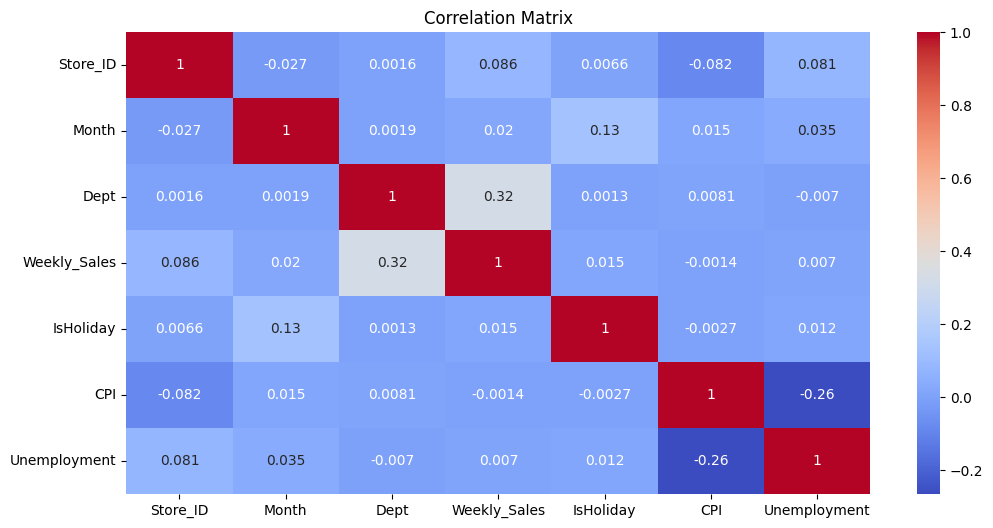

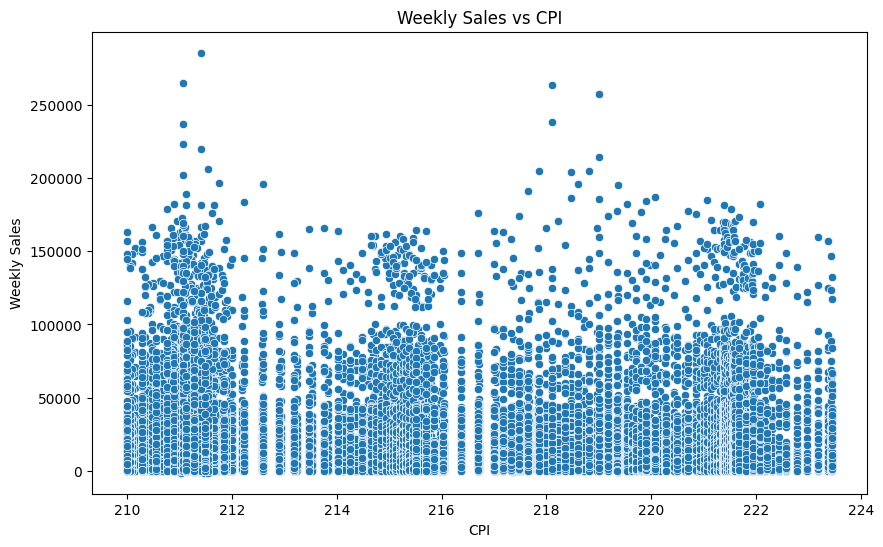

In [18]:


plt.figure(figsize=(12, 6))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of Weekly_Sales vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=combined_data)
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


## Summary of Results

Below is a summary of the key statistics from the combined data.

In [11]:

# Generate summary statistics
summary = combined_data.describe()
print(summary)


           Store_ID         Month          Dept   Weekly_Sales      IsHoliday  \
count  20000.000000  19961.000000  20000.000000   19962.000000  231522.000000   
mean       1.487800      6.376584     44.437750   24272.506712       0.070576   
std        0.499864      3.246458     29.926163   30580.043926       0.256117   
min        1.000000      1.000000      1.000000   -1098.000000       0.000000   
25%        1.000000      4.000000     20.000000    4308.050000       0.000000   
50%        1.000000      6.000000     38.000000   11934.820000       0.000000   
75%        2.000000      9.000000     72.000000   32644.190000       0.000000   
max        2.000000     12.000000     99.000000  285353.530000       1.000000   

                 CPI   Unemployment  
count  231475.000000  231485.000000  
mean      175.236255       7.500052  
std        40.220678       1.647941  
min       126.064000       3.879000  
25%       132.497600       6.496000  
50%       189.842483       7.484000  
75% 

## Step 7: Monthly Sales Analysis

Analyze the monthly sales of Walmart.

In [12]:

# Group by Month and calculate average weekly sales
agg_data = combined_data.groupby('Month')['Weekly_Sales'].mean().reset_index()
agg_data.columns = ['Month', 'Weekly_Sales']
print(agg_data)

# Save the aggregated data
agg_data.to_csv('agg_data.csv', index=False)
print("agg_data saved successfully.")


    Month  Weekly_Sales
0     1.0  21837.685810
1     2.0  25302.978327
2     3.0  24091.268754
3     4.0  23991.753480
4     5.0  24093.683561
5     6.0  24798.314364
6     7.0  23377.092319
7     8.0  24112.965571
8     9.0  22515.931182
9    10.0  22616.233090
10   11.0  26231.993359
11   12.0  28950.496445
agg_data saved successfully.


## Step 8: You can Save the Data on you local system using the below step

In [20]:
from IPython.display import FileLink, FileLinks

# Save the CSV files
combined_data.to_csv('clean_data.csv', index=False)
agg_data.to_csv('agg_data.csv', index=False)

# Create download links
display(FileLink('clean_data.csv'))
display(FileLink('agg_data.csv'))


c:\Users\12145\Desktop\clean_data.csv

c:\Users\12145\Desktop\agg_data.csv

In [ ]:
""